In [1]:

!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
     

%matplotlib inline

IMPORTING DATA

In [7]:
stocks = ['CIPLA.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS', 'TATAMOTORS.NS']

start_date = '2015-01-01'
end_date = '2022-09-30'

DOWNLOADING AND STORING DATA



In [8]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']
    
stock_prices = pd.DataFrame(stock_data)
stock_prices

,CIPLA.NS,RELIANCE.NS,HDFCBANK.NS,TCS.NS,TATAMOTORS.NS
Date,,,,,
2015-01-01 00:00:00+05:30,607.775330,417.988892,451.475311,1075.851074,492.960724
2015-01-02 00:00:00+05:30,609.467834,416.882629,457.758606,1090.178223,506.163696
2015-01-05 00:00:00+05:30,612.224365,412.316193,453.893768,1073.610718,518.031555
2015-01-06 00:00:00+05:30,594.186401,393.603485,446.828003,1034.030640,495.878235
2015-01-07 00:00:00+05:30,591.865234,402.171295,448.132111,1021.816284,488.411377
...,...,...,...,...,...
2022-09-23 00:00:00+05:30,1068.099976,2439.500000,1446.150024,2915.298096,423.100006
2022-09-26 00:00:00+05:30,1065.650024,2377.350098,1426.650024,2927.371338,397.500000
2022-09-27 00:00:00+05:30,1098.699951,2396.250000,1413.849976,2949.905518,398.799988


PRICE CHARTS

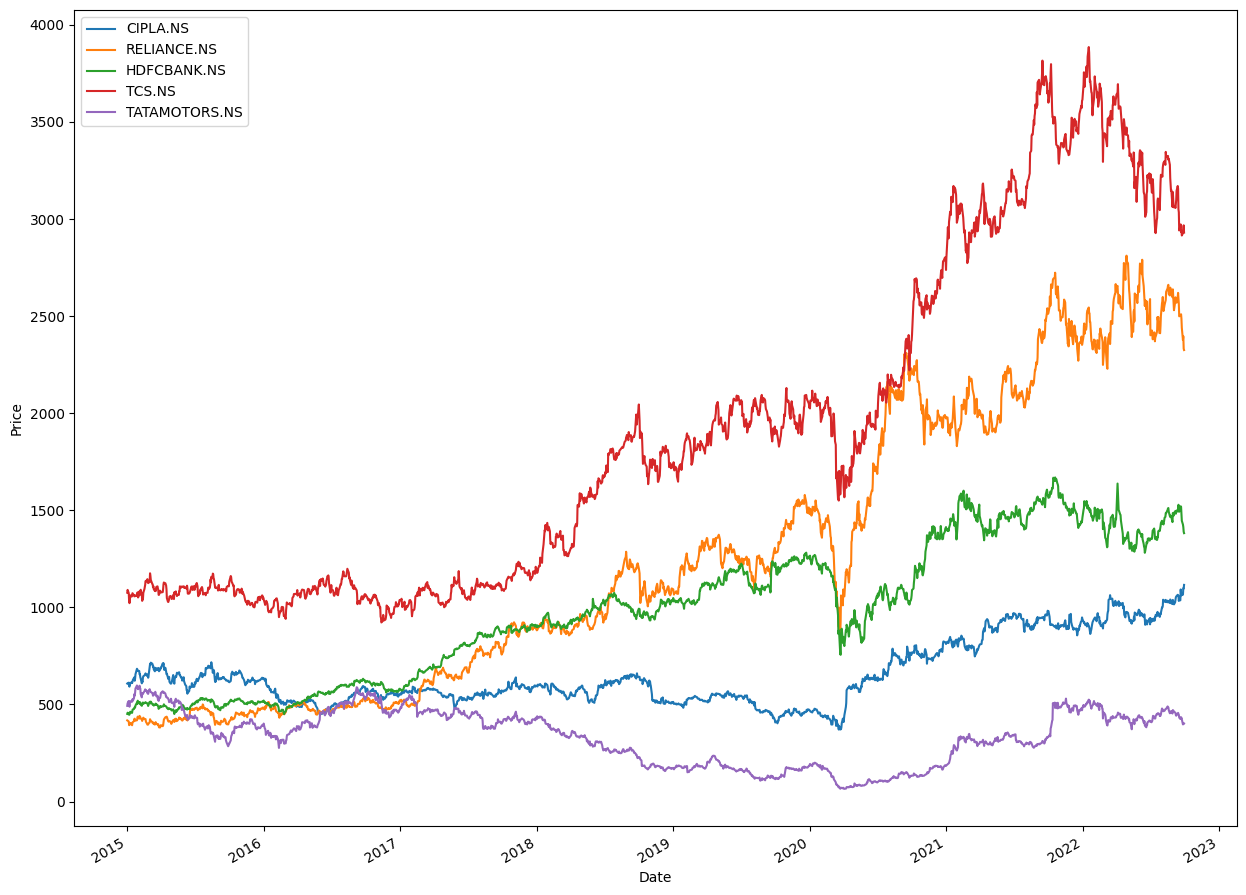

In [9]:
stock_prices.plot(figsize = (15, 12))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

CALCULATING DAILY RETURNS

In [10]:
returns=stock_prices.pct_change()[1:]
returns

,CIPLA.NS,RELIANCE.NS,HDFCBANK.NS,TCS.NS,TATAMOTORS.NS
Date,,,,,
2015-01-02 00:00:00+05:30,0.002785,-0.002647,0.013917,0.013317,0.026783
2015-01-05 00:00:00+05:30,0.004523,-0.010954,-0.008443,-0.015197,0.023447
2015-01-06 00:00:00+05:30,-0.029463,-0.045384,-0.015567,-0.036866,-0.042764
2015-01-07 00:00:00+05:30,-0.003906,0.021768,0.002919,-0.011812,-0.015058
2015-01-08 00:00:00+05:30,0.010213,-0.014339,0.021005,0.010796,0.036752
...,...,...,...,...,...
2022-09-23 00:00:00+05:30,0.005839,-0.018744,-0.026817,-0.008429,-0.021055
2022-09-26 00:00:00+05:30,-0.002294,-0.025476,-0.013484,0.004141,-0.060506
2022-09-27 00:00:00+05:30,0.031014,0.007950,-0.008972,0.007698,0.003270


In [13]:
#Calculating mean returns for a year
mean_returns=returns.mean()*252
mean_returns

CIPLA.NS         0.117761
RELIANCE.NS      0.270008
HDFCBANK.NS      0.175089
TCS.NS           0.162272
TATAMOTORS.NS    0.074795
dtype: float64

In [15]:
m = mean_returns.values.reshape(1, len(mean_returns))

In [16]:
#Plotting the covariance matrix
cov = returns.cov()*252
cov

,CIPLA.NS,RELIANCE.NS,HDFCBANK.NS,TCS.NS,TATAMOTORS.NS
CIPLA.NS,0.075959,0.014909,0.011179,0.011297,0.024823
RELIANCE.NS,0.014909,0.087783,0.027952,0.019657,0.047373
HDFCBANK.NS,0.011179,0.027952,0.055132,0.014922,0.037352
TCS.NS,0.011297,0.019657,0.014922,0.060363,0.026220
TATAMOTORS.NS,0.024823,0.047373,0.037352,0.026220,0.204758


In [27]:
c=cov.values
c

array([[0.07595939, 0.01490861, 0.01117878, 0.01129664, 0.02482286],
       [0.01490861, 0.08778311, 0.02795169, 0.01965678, 0.04737287],
       [0.01117878, 0.02795169, 0.05513232, 0.01492169, 0.03735229],
       [0.01129664, 0.01965678, 0.01492169, 0.06036286, 0.02622014],
       [0.02482286, 0.04737287, 0.03735229, 0.02622014, 0.20475817]])

GENERATING PORTFOLIOS

In [18]:
num_portfolios = 30000

In [19]:
results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov, weights)))
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]

MINIMUM VARIANCE PORTFOLIO

In [21]:
#Unit matrix
u = np.ones((1, returns.shape[1]))

In [22]:
#Generating weights for MVP using Markovitz theory
w = np.dot(u, np.linalg.inv(cov))

In [23]:
w = w/np.dot(u, np.dot(np.linalg.inv(cov), u.T))
     

In [24]:
w = w.reshape(w.shape[1])
w

array([ 0.2626147 ,  0.11391515,  0.33340713,  0.31020799, -0.02014497])

In [25]:
#Expected returns
exp = np.sum(w*mean_returns)

#Variance of the portfolio
var = np.sqrt(np.dot(w.T,np.dot(cov, w)))

PLOTTING THE MVP

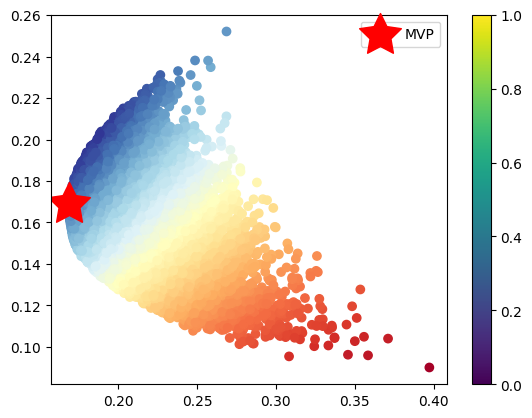

In [26]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.scatter(var, exp,marker=(5,1,0),color='r',s=1000, label = 'MVP')
plt.colorbar()
plt.legend()

# Questions

**Q1. How did you choose the stocks?**

The stocks were picked so that the portfolio built would have the least amount of variation. So stocks from several sectors were chosen for this, so that if one sector falls down at the same time, it can be compensated for by stocks from other sectors, so minimising risk.

**Q2 What is the impact of increasing the number of stocks in the portfolio?**

Increasing the number of stocks in a portfolio with sufficient diversification can help reduce overall risk, but only up to a specific number of stocks. It has been discovered that having more than 20 equities in a portfolio results in very little risk reduction. As a result, the optimal number of equities in a portfolio should be less than 20.

**Q3 Why are calculating the weights by optimization and not giving equal weightage to every stock?**

Giving equal or random weights to the stocks in the portfolio may be dangerous and will not maximise our return that we might have obtained by computing the weights using optimisation. The graph clearly shows that only those weights are good that provide the highest return for a given risk (std).
 As a result, having an efficient portfolio rather than equal or random initialised weights is rational.
